# Predicting <u>price</u> of the laptop

This dataset is from kaggle

### Import useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
%matplotlib inline
sns.set(rc={'figure.figsize':(11,8)})

### Import data

In [2]:
data = pd.read_csv('train.csv',encoding='latin-1')
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### EDA (Exploratory Data Analysis) 

In [3]:
data.corr()

,laptop_ID,Inches,Price_euros
laptop_ID,1.000000,-0.087796,0.067830
Inches,-0.087796,1.000000,0.068197
Price_euros,0.067830,0.068197,1.000000


Get categorical columns

In [4]:
ds_cat = data.select_dtypes(include = 'object').copy()

Create df with unique values of each catergorical columns

In [5]:
def get_df_nunique(df):
    cat_cols = set(df.columns)
    temp_list = []
    for col in cat_cols:
        temp_list.append((col,df[col].nunique()))
    temp_list.sort(key=lambda x:x[1], reverse=True)
    return pd.DataFrame(temp_list, columns =['Categories','Count']) 

Number of unique values in each column

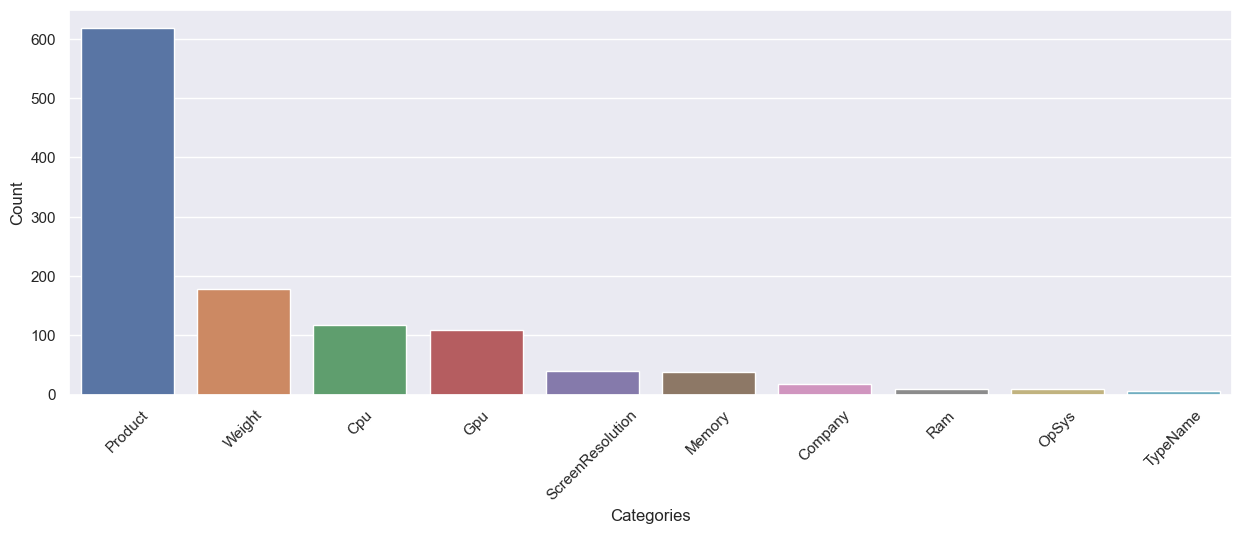

In [6]:
df_nunique = get_df_nunique(ds_cat)


fig = plt.figure(figsize=(15,5))
ax = sns.barplot(data=df_nunique,x='Categories',y='Count')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='Ram', ylabel='Price'>

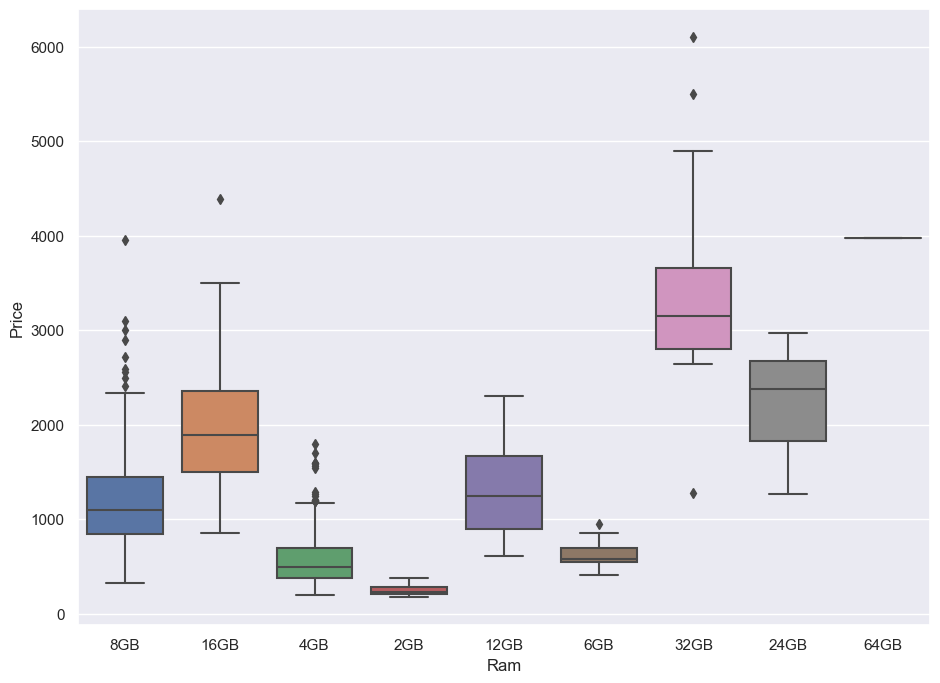

In [7]:
ds_cat['Price'] = data.loc[ds_cat.index, 'Price_euros'].copy()
sns.boxplot(data = ds_cat, x='Ram', y='Price')

<AxesSubplot:xlabel='TypeName', ylabel='Price'>

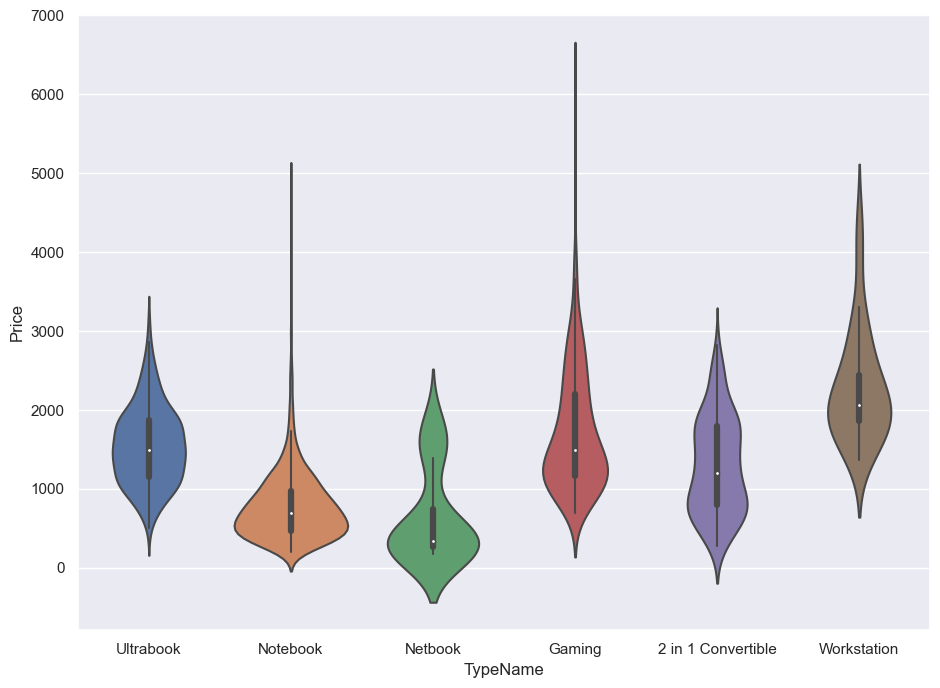

In [8]:
sns.violinplot(data = ds_cat, x='TypeName', y='Price')

<AxesSubplot:>

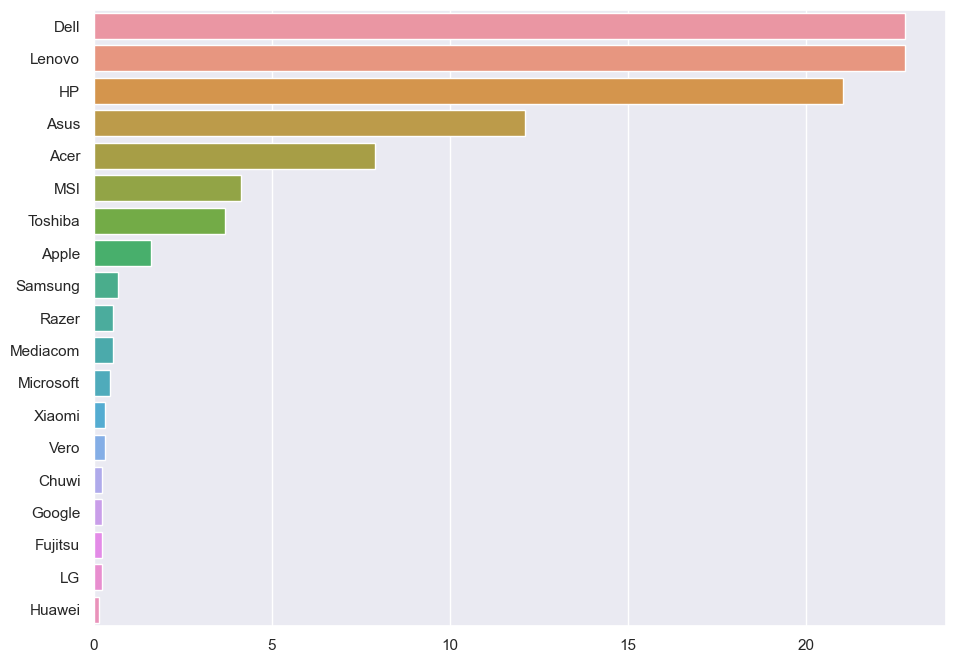

In [9]:
Company_percent = ds_cat['Company'].value_counts(normalize=True)*100
sns.barplot(x=Company_percent.values, y=Company_percent.index)

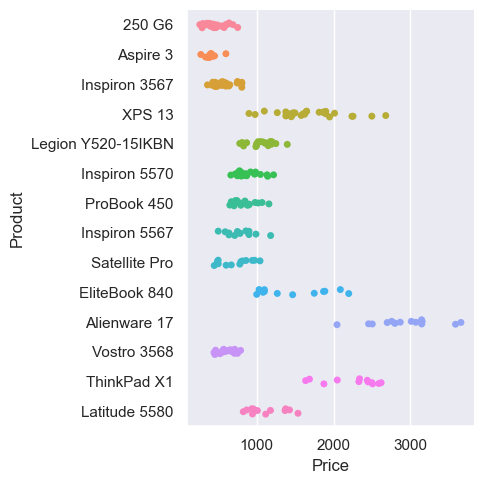

In [10]:
Product_count = ds_cat['Product'].value_counts()
Top_Product = Product_count[Product_count>10].index
Product_df = ds_cat.loc[ds_cat['Product'].isin(Top_Product)].reset_index()
sns.catplot(data=Product_df, x="Price", y="Product")


# Data Clean up

I've selected cols based on low number of unique values that I will encode for the model

In [11]:
def encode_cat_cols(df, cols):
    for col in cols:
        unique_vals = df[col].unique().tolist()
        encoded_cols = {x: i for i, x in enumerate(unique_vals)}
        df[col] = df[col].map(encoded_cols)
        
selected_cols = ['Company', 'TypeName', 'Memory','OpSys']
encode_cat_cols(data,selected_cols)
data.drop(['laptop_ID','Product','ScreenResolution','Cpu','Gpu'],axis=1,inplace=True)
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1270 entries, 0 to 1273
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1270 non-null   int64  
 1   TypeName     1270 non-null   int64  
 2   Inches       1270 non-null   float64
 3   Ram          1270 non-null   object 
 4   Memory       1270 non-null   int64  
 5   OpSys        1270 non-null   int64  
 6   Weight       1270 non-null   object 
 7   Price_euros  1270 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 89.3+ KB


In [12]:
data["Weight"] = data["Weight"].str.extract('(\d*\.?\d*)', expand=False).astype(float)
data["Ram"] = data["Ram"].str.replace('\D', '', regex=True).astype(float)

In [13]:
data.corr()

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price_euros
Company,1.000000,0.009576,-0.058214,0.145807,0.047742,-0.011402,-0.060679,0.145190
TypeName,0.009576,1.000000,0.150828,0.273680,0.192263,0.006124,0.330578,0.291579
Inches,-0.058214,0.150828,1.000000,0.242258,0.198551,-0.186611,0.826306,0.068163
Ram,0.145807,0.273680,0.242258,1.000000,0.279645,-0.092713,0.390368,0.740089
Memory,0.047742,0.192263,0.198551,0.279645,1.000000,0.072150,0.319277,0.160029
OpSys,-0.011402,0.006124,-0.186611,-0.092713,0.072150,1.000000,-0.118029,0.025048
Weight,-0.060679,0.330578,0.826306,0.390368,0.319277,-0.118029,1.000000,0.213192
Price_euros,0.145190,0.291579,0.068163,0.740089,0.160029,0.025048,0.213192,1.000000


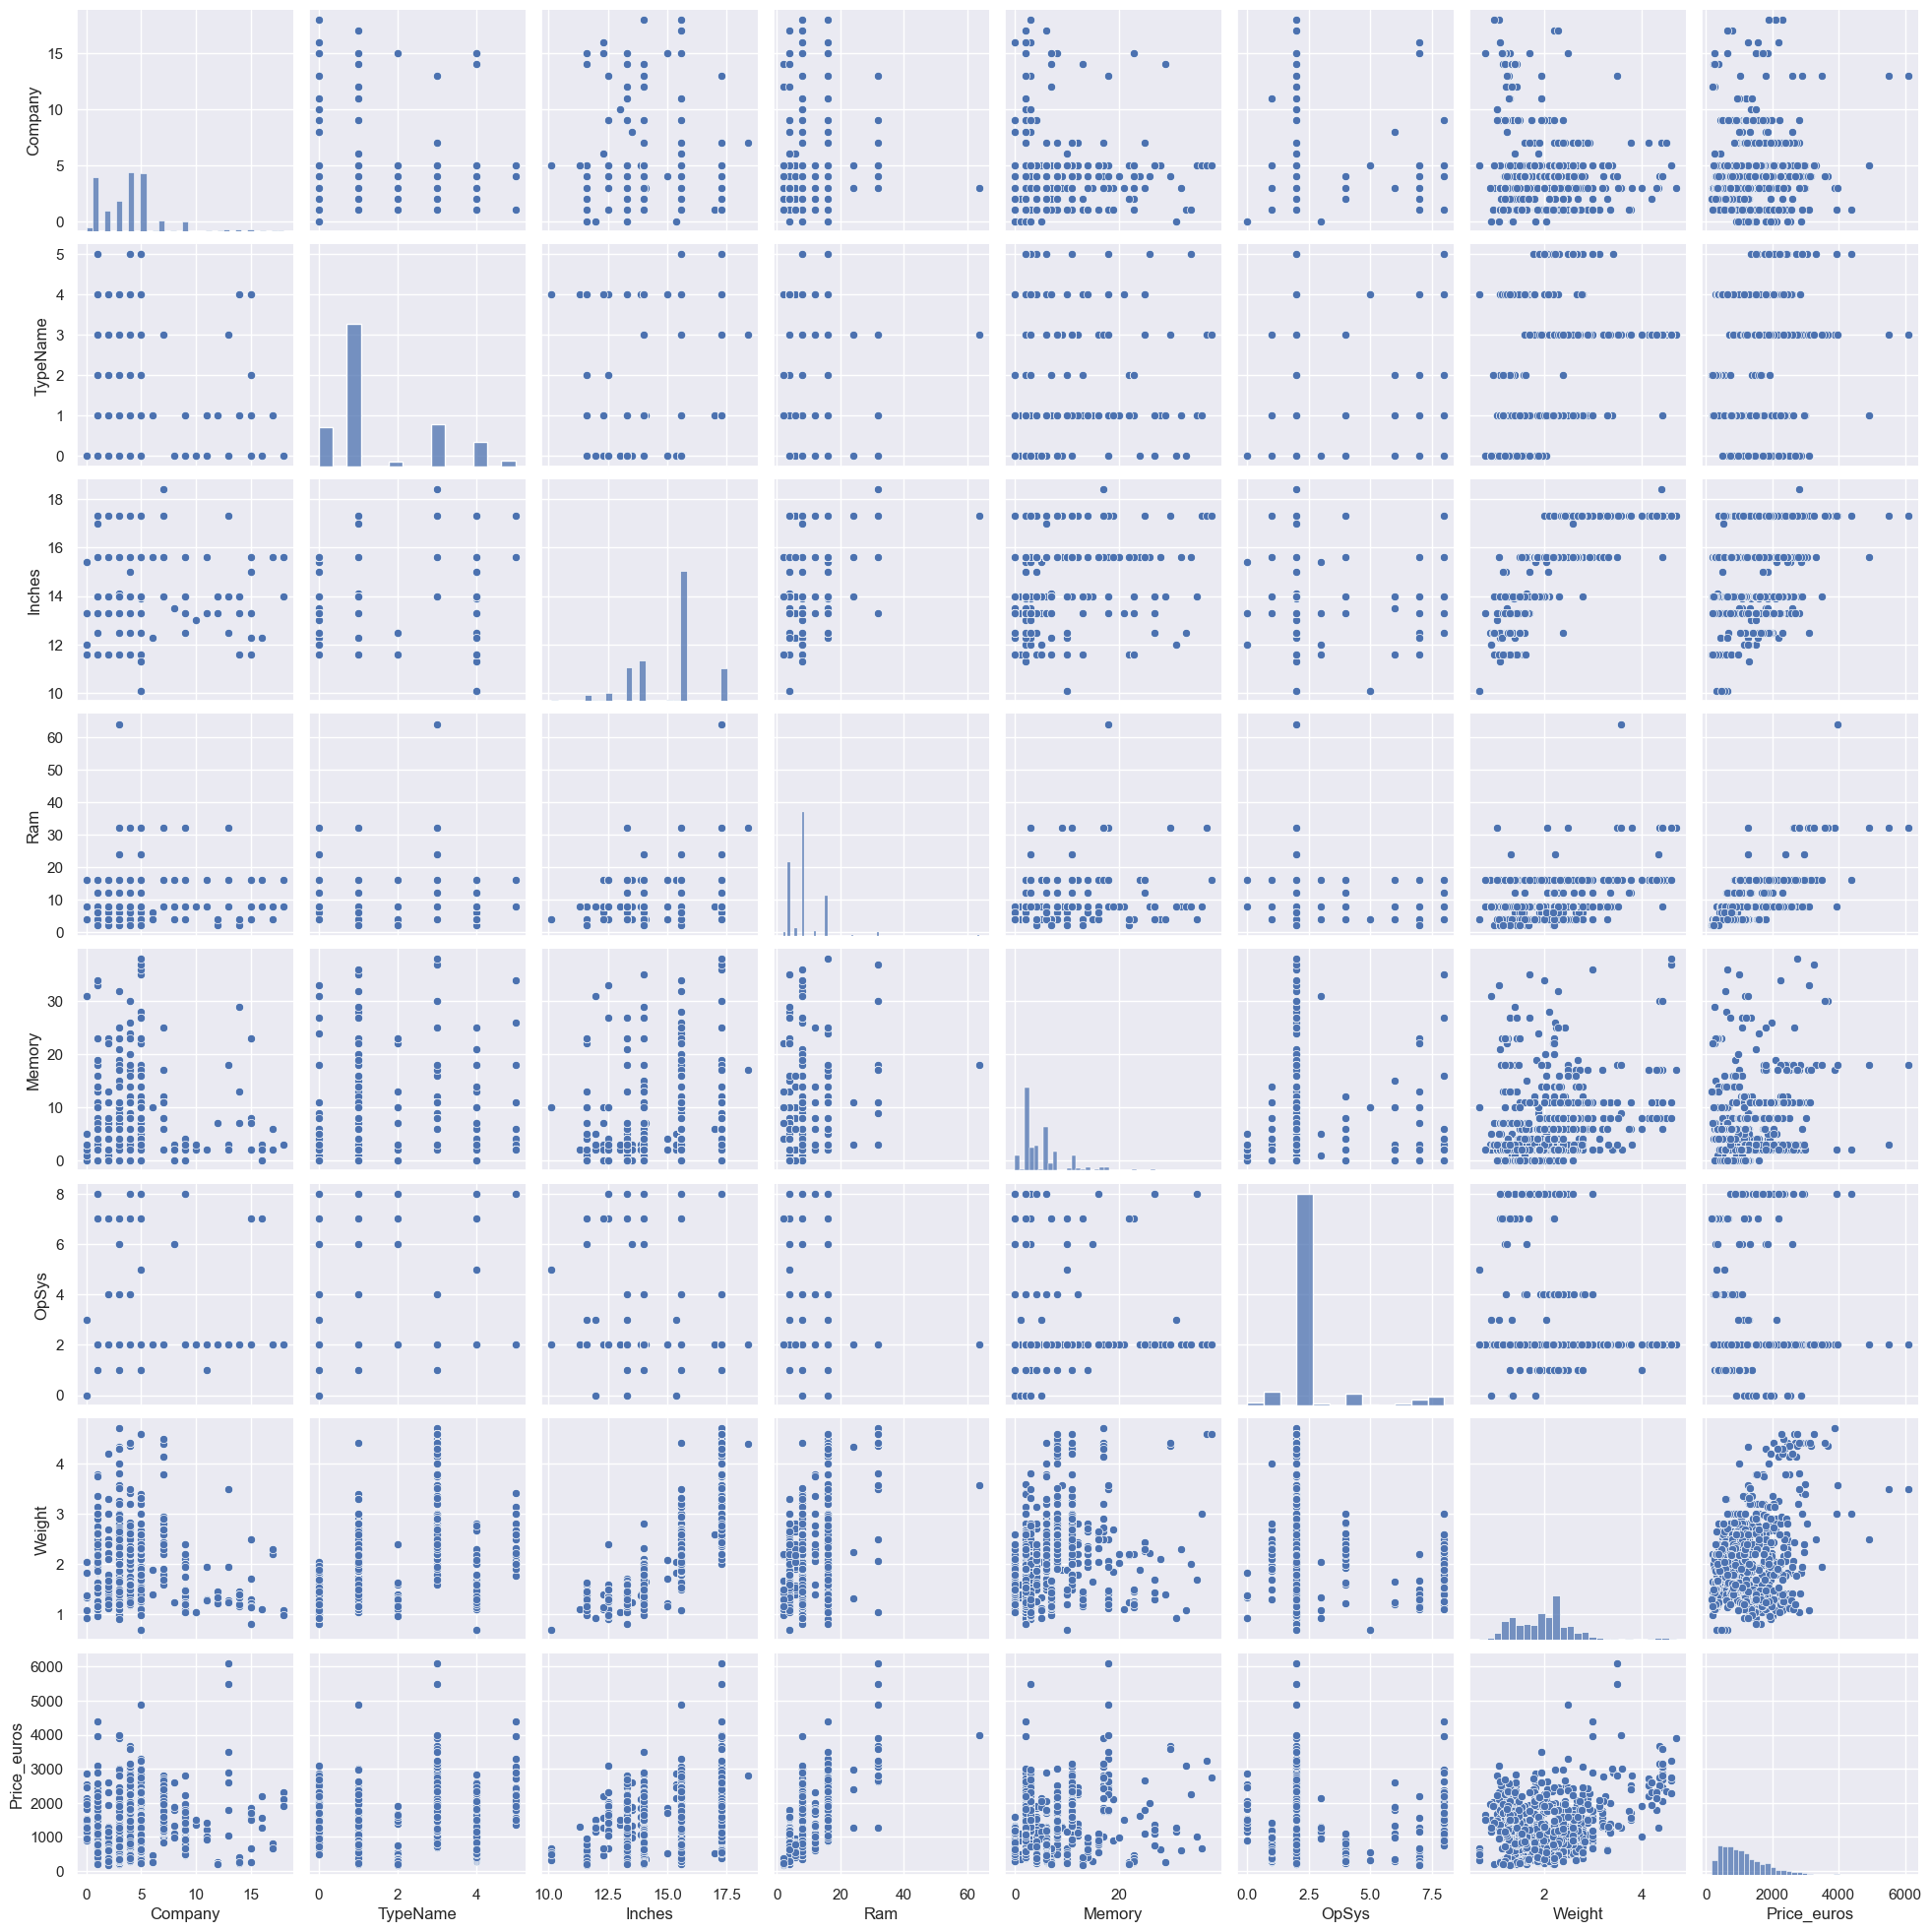

In [14]:
sns.pairplot(data,palette='bwr')

### Test Train Split

In [15]:
from sklearn.model_selection import train_test_split
y = data['Price_euros']
X = data.drop('Price_euros', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 10.49266741  61.12236056 -68.23032598 102.42951698  -4.02923625
  57.45223406  42.68999826]


In [17]:
print('LinearRegression score on training data:',lm.score(X_train, y_train))
print('LinearRegression score on test data:',lm.score(X_test, y_test))

LinearRegression score on training data: 0.6078401814581217
LinearRegression score on test data: 0.45640731891989017


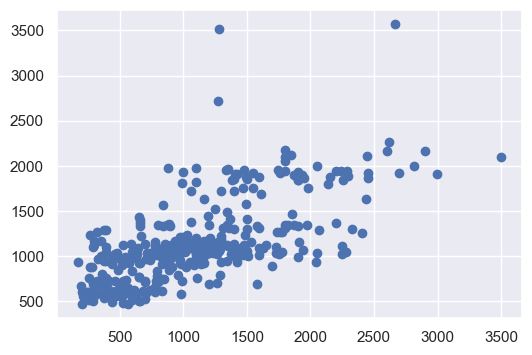

In [18]:
predictions = lm.predict(X_test)
sns.set(rc={'figure.figsize':(6,4)})
plt.scatter(y_test,predictions)

In [19]:
print('R2',metrics.r2_score(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R2 0.45640731891989017
MSE: 195301.18819152197
RMSE: 441.9289402059136


# Support Vector Machines (SVM)

<b><u>Note</b></u>: Commonly used for classification

In [20]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [21]:
print('regressor score on training data:',svm.score(X_train, y_train))
print('regressor score on test data:',svm.score(X_test, y_test))

regressor score on training data: 0.02691885172766184
regressor score on test data: 0.07702691589091959


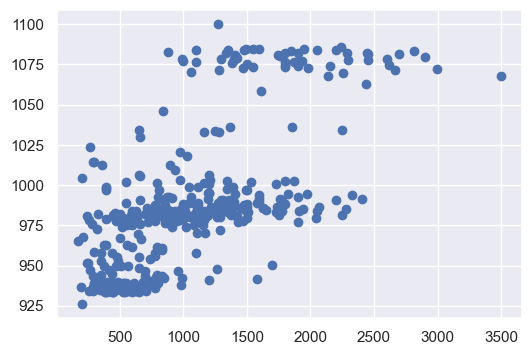

In [22]:
plt.scatter(y_test,y_pred)

In [23]:
print('R2',metrics.r2_score(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 0.07702691589091959
MSE: 331604.4278541936
RMSE: 575.8510465860018


# Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)

In [25]:
print('regressor score on training data:',rf.score(X_train, y_train))
print('regressor score on test data:',rf.score(X_test, y_test))

regressor score on training data: 0.9570623903819727
regressor score on test data: 0.7162491555182092


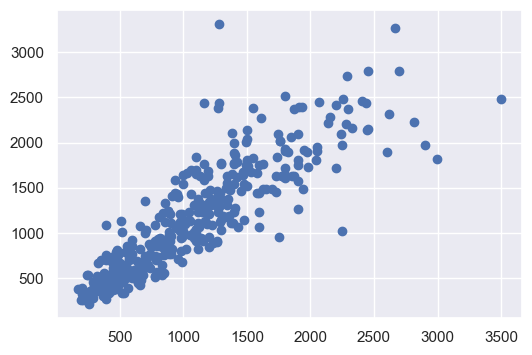

In [26]:
plt.scatter(y_test,prediction)

In [27]:
print('R2',metrics.r2_score(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

R2 0.7162491555182092
MSE: 101945.59089266814
RMSE: 319.2891963293906


# Polynomial Regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=101)

 
poly.fit(X_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_train, y_train)
y_pred = lin2.predict(X_test)

In [29]:
print('Polynomial Regression score on training data:',lin2.score(X_train, y_train))
print('Polynomial Regression score on test data:',lin2.score(X_test, y_test))

Polynomial Regression score on training data: 0.9082996450113664
Polynomial Regression score on test data: -807729.3134110073


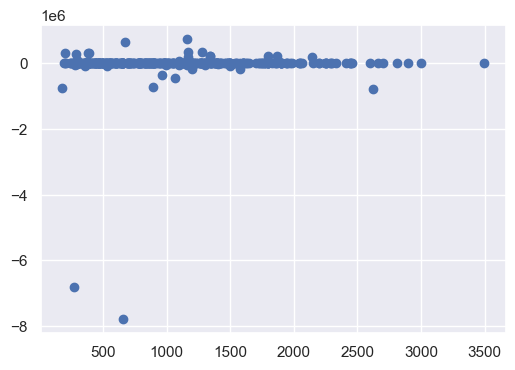

In [30]:
plt.scatter(y_test,y_pred)

In [31]:
print('R2',metrics.r2_score(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 -807729.3134110073
MSE: 290200172736.01276
RMSE: 538702.3043722876
